# Distance to likelihood

A quick test script to see how to go from a distance to likelihood

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


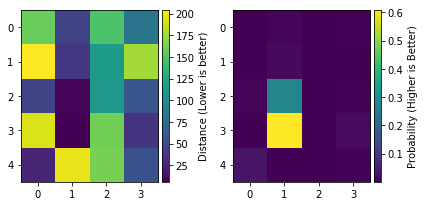

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = np.random.uniform(0, 234, size=20).reshape(5,4)
prob = 1. / data**2.
prob = prob / prob.sum()

fig, (ax0, ax1) = plt.subplots(1,2)

im = ax0.imshow(data)
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax0, label='Distance (Lower is better)')

im = ax1.imshow(prob)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax1, label='Probability (Higher is Better)')

fig.tight_layout()
fig.show()
# print(prob)

In [19]:
x, y = np.meshgrid(range(prob.shape[0]),range(prob.shape[1]) )
xy = np.array([x,y])

In [20]:
from collections import defaultdict

a = defaultdict(int)

for _ in range(1000):
    rand_pos = np.random.choice(range(np.prod(prob.shape)), p=prob.flatten())
    x = rand_pos // prob.shape[0]
    y = rand_pos % prob.shape[1]
    a[(x,y)] += 1

In [21]:
loc = np.unravel_index(np.argmin(data, axis=None), prob.shape)

In [22]:
loc

(3, 1)

In [23]:
a

defaultdict(int,
            {(0, 0): 2,
             (0, 1): 11,
             (0, 2): 6,
             (0, 3): 3,
             (1, 0): 9,
             (1, 1): 293,
             (1, 2): 2,
             (1, 3): 1,
             (2, 0): 1,
             (2, 1): 598,
             (2, 2): 2,
             (2, 3): 7,
             (3, 0): 36,
             (3, 1): 1,
             (3, 3): 28})

In [25]:
from collections import defaultdict

func = lambda: {'correct':0, 'wrong':0, 'accuracy':0}
book = defaultdict(func)

book['1_1']['correct'] +=1
book['1_2']['correct'] +=1
book['1_3']['correct'] +=1
book

defaultdict(<function __main__.<lambda>>,
            {'1_1': {'accuracy': 0, 'correct': 1, 'wrong': 0},
             '1_2': {'accuracy': 0, 'correct': 1, 'wrong': 0},
             '1_3': {'accuracy': 0, 'correct': 1, 'wrong': 0}})

In [32]:
{f'{k}_{k2}': v2 for k, v in book.items() for k2, v2 in v.items()}

{'1_1_accuracy': 0,
 '1_1_correct': 1,
 '1_1_wrong': 0,
 '1_2_accuracy': 0,
 '1_2_correct': 1,
 '1_2_wrong': 0,
 '1_3_accuracy': 0,
 '1_3_correct': 1,
 '1_3_wrong': 0}